In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
melbourne_data = pd.read_csv('house.csv') 
melbourne_data

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,03/12/16,2.5,...,1,1.0,202,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,04/02/16,2.5,...,1,0.0,156,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,04/03/17,2.5,...,2,0.0,134,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,04/03/17,2.5,...,2,1.0,94,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,04/06/16,2.5,...,1,2.0,120,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11656,23537,Wheelers Hill,12 Strada Cr,4,h,1245000,S,Barry,26/08/2017,16.7,...,2,2.0,652,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392
11657,23538,Williamstown,77 Merrett Dr,3,h,1031000,SP,Williams,26/08/2017,6.8,...,2,2.0,333,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380
11658,23539,Williamstown,83 Power St,3,h,1170000,S,Raine,26/08/2017,6.8,...,2,4.0,436,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380
11659,23541,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,...,1,5.0,866,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380


In [3]:
cut_labels = ['Low','Medium','High'] 
cut_bins = [0, 900000, 1200000, 10000000] #0: min, 100: max
melbourne_data['Price_lable'] = pd.cut(melbourne_data['Price'], bins=cut_bins, labels=cut_labels)

In [4]:
melbourne_data.columns
melbourne_data.head()
y = melbourne_data.Price_lable #NHÃN PHÂN LỚP
#CHỌN CÁC THUỘC TÍNH PHÂN LỚP
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.describe()
X.head()
y
#melbourne_data.Price_lable

0          High
1        Medium
2          High
3           Low
4          High
          ...  
11656      High
11657    Medium
11658    Medium
11659      High
11660      High
Name: Price_lable, Length: 11661, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [5]:
melbourne_data.columns
melbourne_data.head()
y = melbourne_data.Price_lable #NHÃN PHÂN LỚP
#CHỌN CÁC THUỘC TÍNH PHÂN LỚP
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.describe()
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1,202,-37.7996,144.9984
1,2,1,156,-37.8079,144.9934
2,3,2,134,-37.8093,144.9944
3,3,2,94,-37.7969,144.9969
4,4,1,120,-37.8072,144.9941


In [6]:
from sklearn.model_selection import train_test_split
#CHIA DỮ LIỆU 80% TRAIN, 20% TEST
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=3)

In [7]:
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
#Train Decision Tree based on training set
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7248178311187312
[[664  57 124]
 [ 41 828 136]
 [136 148 199]]
              precision    recall  f1-score   support

        High       0.79      0.79      0.79       845
         Low       0.80      0.82      0.81      1005
      Medium       0.43      0.41      0.42       483

    accuracy                           0.72      2333
   macro avg       0.67      0.67      0.67      2333
weighted avg       0.72      0.72      0.72      2333



In [9]:
target=melbourne_data['Price_lable'].unique()

In [10]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image  
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=melbourne_features,  
                                class_names=target) 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.272045 to fit



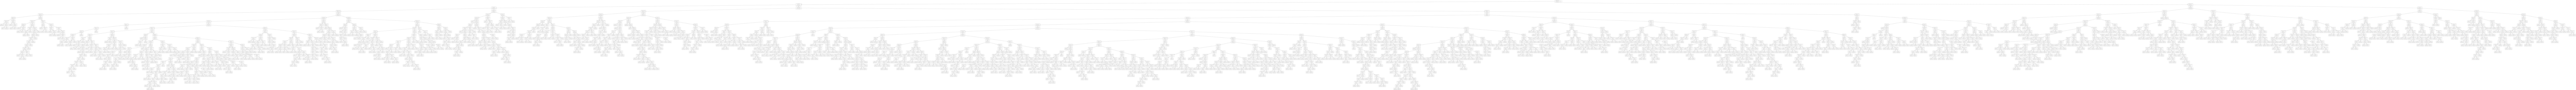

In [11]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

In [12]:
graph.write_pdf("D:/thuchanhKPDL/thuchanhlab8_9/cayquyetdinh.pdf")
# Create PNG
graph.write_png("D:/thuchanhKPDL/thuchanhlab8_9/marketing.png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.272045 to fit



True